# Introduction to Deep Learning with PyTorch: Neural Networks for Regression and Classification

In this notebook, we demonstrate how to build neural network models for both regression and classification tasks using PyTorch. **Only neural networks (i.e., multi-layer perceptrons) are used.**

The notebook is organized as follows:

1. **Regression Example:**
    - Generate synthetic regression data.
    - Build a neural network with a hidden layer to learn the relationship.
    - Train the network using Mean Squared Error (MSE) loss and visualize the results.

2. **Classification Example:**
    - Generate synthetic data for binary classification.
    - Build a neural network with a hidden layer for classification.
    - Train the network using Binary Cross-Entropy (BCE) loss and visualize the decision boundary.

Let's begin by setting up our environment.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

## 1. Regression Example with a Neural Network

We generate synthetic regression data following the relationship:

\[
y = 2x + 1 + \text{noise}
\]

We then build a neural network with one hidden layer to learn this relationship.

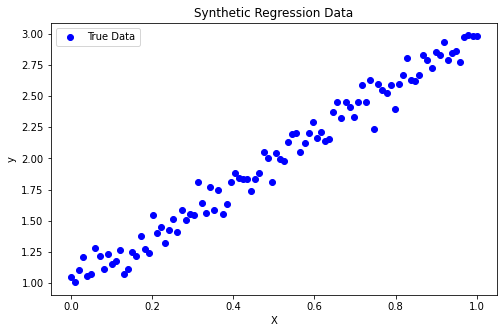

In [2]:
# Generate synthetic regression data
n_samples = 100
X_reg = np.linspace(0, 1, n_samples)
y_reg = 2 * X_reg + 1 + np.random.normal(0, 0.1, n_samples)

# Convert the data to torch tensors (shape: [n_samples, 1])
X_reg_tensor = torch.tensor(X_reg, dtype=torch.float32).unsqueeze(1)
y_reg_tensor = torch.tensor(y_reg, dtype=torch.float32).unsqueeze(1)

# Plot the synthetic data
plt.figure(figsize=(8, 5))
plt.scatter(X_reg, y_reg, color="blue", label="True Data")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Synthetic Regression Data")
plt.legend()
plt.show()

### Neural Network Model for Regression

We define a simple neural network with:

- An input layer of dimension 1.
- One hidden layer with 10 neurons and ReLU activation.
- An output layer of dimension 1 (for regression output).

In [6]:
class RegressionNN(nn.Module):
    def __init__(self, input_dim=1, hidden_dim=1000, output_dim=1):
        super(RegressionNN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)
        )
    
    def forward(self, x):
        return self.net(x)

# Initialize the regression neural network
model_reg = RegressionNN()

### Training the Regression Model

We use the Mean Squared Error (MSE) loss function and the Adam optimizer.

In [7]:
criterion_reg = nn.MSELoss()
optimizer_reg = optim.Adam(model_reg.parameters(), lr=0.01)

n_epochs = 1000
loss_history_reg = []

for epoch in range(n_epochs):
    optimizer_reg.zero_grad()             # Zero the gradients
    outputs = model_reg(X_reg_tensor)       # Forward pass
    loss = criterion_reg(outputs, y_reg_tensor)  # Compute loss
    loss.backward()                       # Backward pass
    optimizer_reg.step()                  # Update parameters
    loss_history_reg.append(loss.item())
    
    if (epoch + 1) % 200 == 0:
        print(f"Epoch {epoch+1}/{n_epochs}, Loss: {loss.item():.4f}")

Epoch 200/1000, Loss: 0.0076
Epoch 400/1000, Loss: 0.0074
Epoch 600/1000, Loss: 0.0073
Epoch 800/1000, Loss: 0.0072
Epoch 1000/1000, Loss: 0.0071


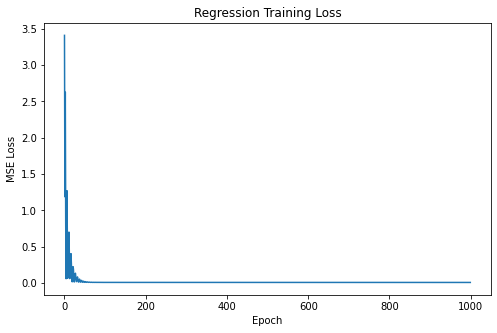

In [8]:
# Plot training loss
plt.figure(figsize=(8, 5))
plt.plot(loss_history_reg)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Regression Training Loss")
plt.show()

### Visualizing the Regression Results

We compare the neural network predictions to the true data.

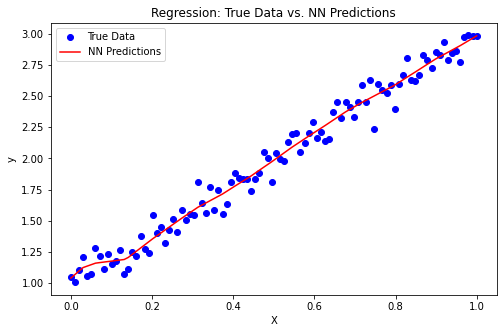

In [9]:
with torch.no_grad():
    predictions = model_reg(X_reg_tensor).numpy()

plt.figure(figsize=(8, 5))
plt.scatter(X_reg, y_reg, color="blue", label="True Data")
plt.plot(X_reg, predictions, color="red", label="NN Predictions")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Regression: True Data vs. NN Predictions")
plt.legend()
plt.show()

## 2. Classification Example with a Neural Network

Next, we create a binary classification task by generating synthetic data from two distinct Gaussian distributions. We then build a neural network with one hidden layer to classify the data.

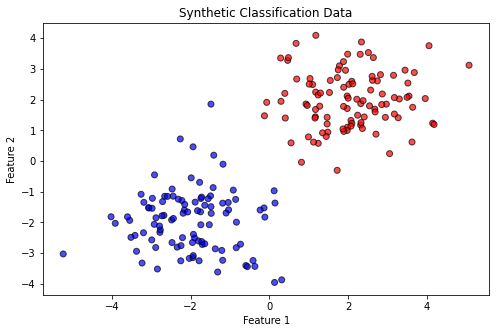

In [10]:
# Generate synthetic classification data
n_samples_class = 100

# Class 0: centered at (-2, -2)
X_class0 = np.random.randn(n_samples_class, 2) + np.array([-2, -2])
y_class0 = np.zeros(n_samples_class)

# Class 1: centered at (2, 2)
X_class1 = np.random.randn(n_samples_class, 2) + np.array([2, 2])
y_class1 = np.ones(n_samples_class)

# Combine the data for both classes
X_class = np.vstack((X_class0, X_class1))
y_class = np.hstack((y_class0, y_class1))

# Convert data to torch tensors
X_class_tensor = torch.tensor(X_class, dtype=torch.float32)
y_class_tensor = torch.tensor(y_class, dtype=torch.float32).unsqueeze(1)

# Plot the synthetic classification data
plt.figure(figsize=(8, 5))
plt.scatter(X_class[:, 0], X_class[:, 1], c=y_class, cmap="bwr", edgecolors="k", alpha=0.7)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Synthetic Classification Data")
plt.show()

### Neural Network Model for Classification

We define a neural network with:

- An input layer of dimension 2.
- One hidden layer with 10 neurons and ReLU activation.
- An output layer with 1 neuron followed by a Sigmoid activation (to output probabilities).

In [11]:
class ClassificationNN(nn.Module):
    def __init__(self, input_dim=2, hidden_dim=10, output_dim=1):
        super(ClassificationNN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim),
            nn.Sigmoid()  # Sigmoid activation for probability output
        )
    
    def forward(self, x):
        return self.net(x)

# Initialize the classification neural network
model_class = ClassificationNN()

### Training the Classification Model

We use the Binary Cross-Entropy (BCE) loss function and the Adam optimizer for training.

In [12]:
criterion_class = nn.BCELoss()
optimizer_class = optim.Adam(model_class.parameters(), lr=0.01)

n_epochs_class = 1000
loss_history_class = []

for epoch in range(n_epochs_class):
    optimizer_class.zero_grad()               # Zero the gradients
    outputs = model_class(X_class_tensor)       # Forward pass
    loss = criterion_class(outputs, y_class_tensor)  # Compute BCE loss
    loss.backward()                           # Backward pass
    optimizer_class.step()                      # Update parameters
    loss_history_class.append(loss.item())
    
    if (epoch + 1) % 200 == 0:
        print(f"Epoch {epoch+1}/{n_epochs_class}, Loss: {loss.item():.4f}")

Epoch 200/1000, Loss: 0.0030
Epoch 400/1000, Loss: 0.0011
Epoch 600/1000, Loss: 0.0006
Epoch 800/1000, Loss: 0.0003
Epoch 1000/1000, Loss: 0.0002


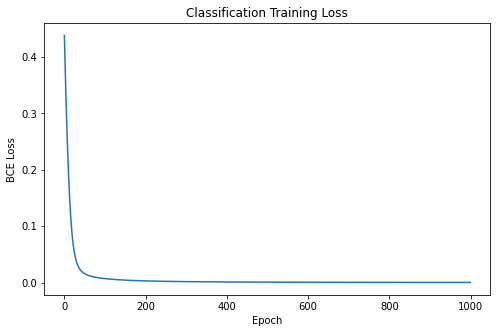

In [13]:
# Plot classification training loss
plt.figure(figsize=(8, 5))
plt.plot(loss_history_class)
plt.xlabel("Epoch")
plt.ylabel("BCE Loss")
plt.title("Classification Training Loss")
plt.show()

### Visualizing the Decision Boundary

We generate a grid of points across the feature space, predict their class probabilities, and then plot the decision boundary.

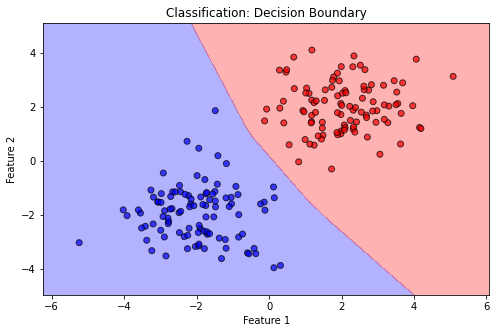

In [14]:
# Create a grid over the feature space
x_min, x_max = X_class[:, 0].min() - 1, X_class[:, 0].max() + 1
y_min, y_max = X_class[:, 1].min() - 1, X_class[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]
grid_tensor = torch.tensor(grid, dtype=torch.float32)

# Compute model predictions on the grid
with torch.no_grad():
    preds_grid = model_class(grid_tensor).reshape(xx.shape).numpy()

# Plot the decision boundary and the data
plt.figure(figsize=(8, 5))
plt.contourf(xx, yy, preds_grid, levels=[0, 0.5, 1], alpha=0.3, colors=["blue", "red"])
plt.scatter(X_class[:, 0], X_class[:, 1], c=y_class, cmap="bwr", edgecolors="k", alpha=0.7)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Classification: Decision Boundary")
plt.show()

## Conclusion

In this notebook, we introduced deep learning with PyTorch using neural networks exclusively for both regression and classification tasks.

- For **regression**, we built a neural network with one hidden layer to learn a simple linear relationship with noise.
- For **classification**, we constructed a neural network with one hidden layer to distinguish between two classes generated from distinct Gaussian distributions.

These examples serve as a foundation for exploring more complex neural network architectures and deep learning techniques with PyTorch.